

---


**ASSIGNMENT 3**

**Histogram Equalization**








NIM : 1301200390

Nama : Raden Fasya Mazaya Putri


---

Source (thanks to) [torywalker](https://github.com/torywalker/histogram-equalizer.git)

In [1]:
# Import library
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Git clone library for this assignment

!git clone https://github.com/fasyamazaya/pcd_assignment_library.git

fatal: destination path 'pcd_assignment_library' already exists and is not an empty directory.


In [3]:
# Add the image
image = cv2.imread("/content/pcd_assignment_library/sample2.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

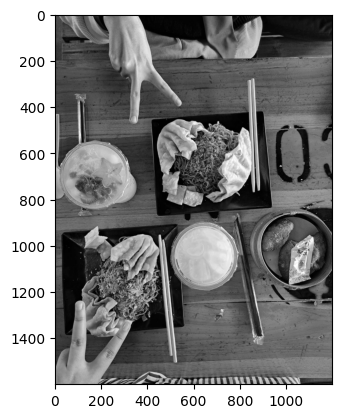

In [4]:
# display the image
plt.imshow(img, cmap='gray')

In [5]:
# convert image into a numpy array
img = np.asarray(img)

(array([88931., 63169., 49295., 37108., 27344., 22804., 21785., 24474.,
        30400., 39787., 54642., 48938., 57902., 65554., 70028., 72519.,
        72043., 75127., 74848., 75342., 97390., 82525., 68314., 56681.,
        47141., 40503., 34586., 31980., 30161., 28554., 32252., 25964.,
        25810., 26302., 26047., 24995., 24756., 23797., 24209., 19996.,
        17465., 11888., 11689.,  9198.,  7070.,  6651.,  4826.,  3265.,
         2655.,  1290.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

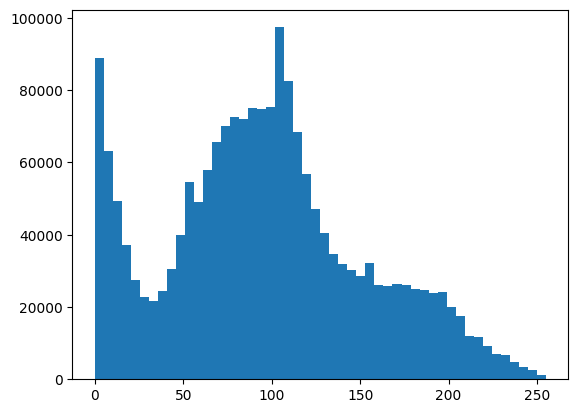

In [6]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [7]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

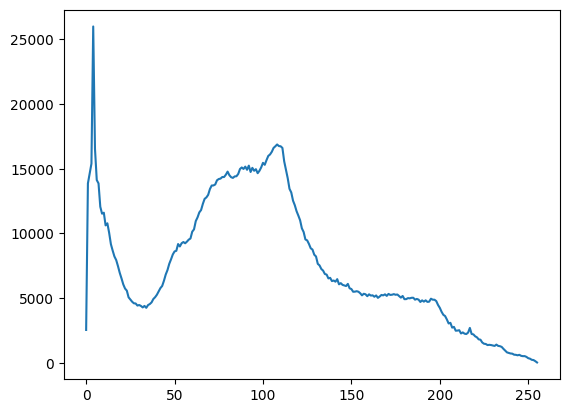

In [8]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)

    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1

    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

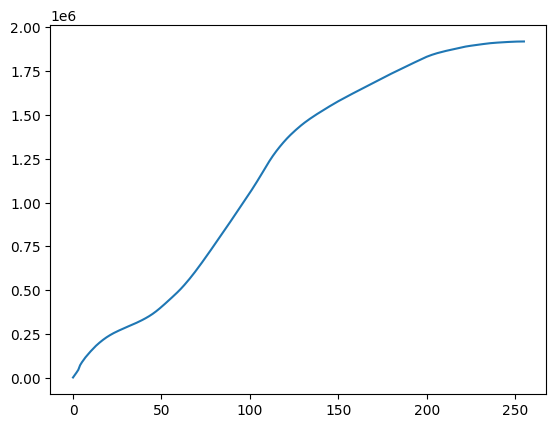

In [9]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [10]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

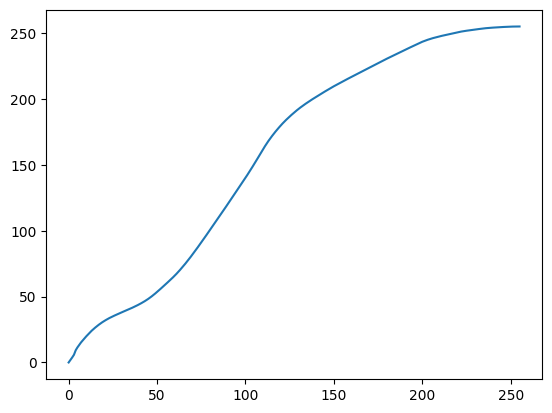

In [11]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

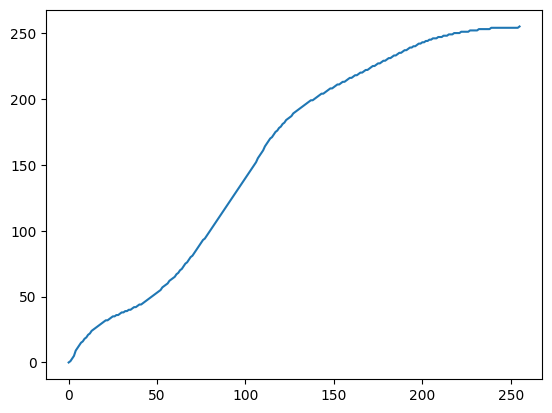

In [12]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([46409., 25988., 44521., 35182., 40622., 39257., 38592., 39865.,
        35771., 33918., 42807., 36807., 38625., 44129., 36755., 39186.,
        27405., 42086., 42949., 29308., 43130., 43411., 30070., 45057.,
        29983., 44865., 29489., 45853., 31647., 49012., 33603., 33480.,
        47085., 40872., 36426., 32785., 38289., 41829., 35588., 38504.,
        47722., 37947., 36469., 36395., 41724., 34764., 38343., 39479.,
        36613., 39384.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

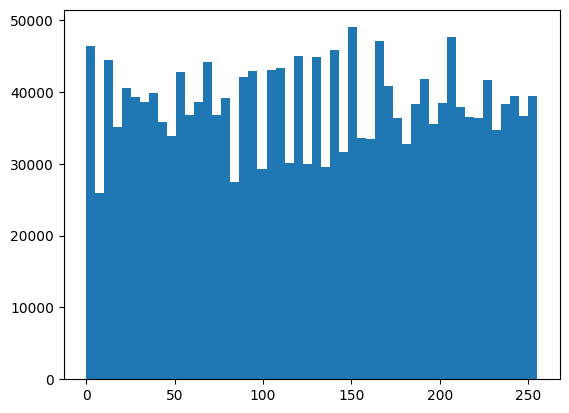

In [13]:
# get the value from cumulative sum for every index in flat, and set that as img_new
flat_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(flat_new, bins=50)

In [15]:
# put array back into original shape since we flattened it
img_new = np.reshape(flat_new, img.shape)
img_new

array([[ 76,  78,  75, ...,  19,  19,  19],
       [ 87,  85,  78, ...,  19,  19,  19],
       [ 89,  85,  78, ...,  19,  19,  19],
       ...,
       [208, 208, 205, ...,  42,  43,  44],
       [207, 206, 204, ...,  46,  48,  50],
       [206, 205, 204, ...,  49,  52,  54]], dtype=uint8)

(array([46409., 25988., 44521., 35182., 40622., 39257., 38592., 39865.,
        35771., 33918., 42807., 36807., 38625., 44129., 36755., 39186.,
        27405., 42086., 42949., 29308., 43130., 43411., 30070., 45057.,
        29983., 44865., 29489., 45853., 31647., 49012., 33603., 33480.,
        47085., 40872., 36426., 32785., 38289., 41829., 35588., 38504.,
        47722., 37947., 36469., 36395., 41724., 34764., 38343., 39479.,
        36613., 39384.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

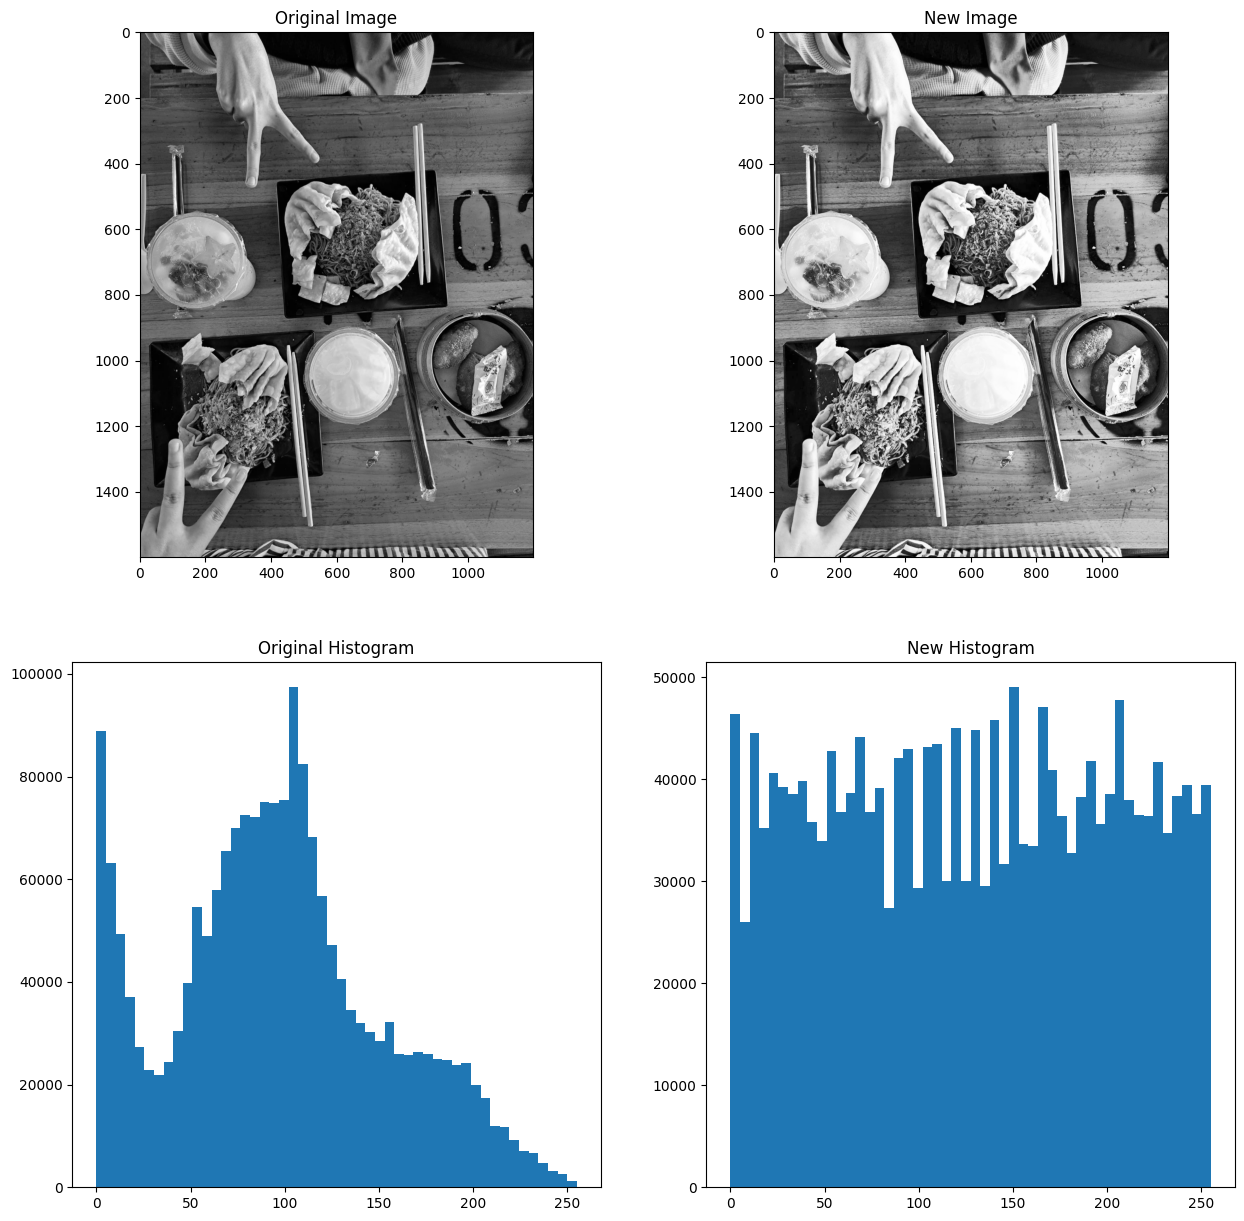

In [16]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

#fig.add_subplot(1,2,1)
fig.add_subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

# display the new image
#fig.add_subplot(1,2,2)
fig.add_subplot(2,2,2)
plt.title("New Image")
plt.imshow(img_new, cmap='gray')

# display histogram original image
fig.add_subplot(2,2,3)
plt.title("Original Histogram")
plt.hist(flat, bins=50)

# display histogram new image
fig.add_subplot(2,2,4)
plt.title("New Histogram")
plt.hist(flat_new, bins=50)

#plt.show(block=False, close=False)

Thank you